# PROJECT 2 – SUPERVISED TECHNIQUES


**Team members:**
- José Pablo Del Moral
- Pol Tordera
- Ferran Serramalera
- Bruno Pin
- Oscar Grau

## PROJECT MAIN GOALS

The main goals of this project will be to understand the practical application of the use of two 
specific models: Knn and SVM. In addition, some conclusions will be requested to compare the 
different methods, emphasizing pros and cons of each one of them.
The dataset is not going to be provided, so the student can select how difficulty of the 
development part. According to the dataset characteristics and the justification of the choice, 
the project results would be more realistic and value-rich, and this fact is going to be into 
consideration for the project score.

## PROJECT DELIVERY

The final delivery will be a zip file, which must contain:
- Ipynb document: jupyter script where the code is developed.
- Html document: same jupyter script downloaded as .html document. The kernel 
must be executed before downloading it. 
- Dataset: Provide the dataset document.

## PROJECT DEVELOPMENT

### 1 Choosing a dataset

### Breast Cancer Precitions (SVM & KNN)

Attribute Information

- 1) ID number
- 2) Diagnosis (M = malignant, B = benign)
- 3-32)

- Ten real-valued features are computed for each cell nucleus:

- a) radius (mean of distances from center to points on the perimeter)
- b) texture (standard deviation of gray-scale values)
- c) perimeter
- d) area
- e) smoothness (local variation in radius lengths)
- f) compactness (perimeter^2 / area - 1.0)
- g) concavity (severity of concave portions of the contour)
- h) concave points (number of concave portions of the contour)
- i) symmetry
- j) fractal dimension ("coastline approximation" - 1)



### Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report
from sklearn import metrics
import warnings
warnings.simplefilter(action='ignore')

### Load data 

In [2]:
import os

In [3]:
df = pd.read_csv('data.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

#### 1.2. Why is it an appropriate dataset? Does it require any modification or adaptation to be used?
We believe that the dataset explains an interesting topic such as breast cancer and I believe that it is accurate since the variables found in the dataset are highly indicative. Looking at the dataset, we can see that the last variable that has the name of unnamed 32 we believe that it is not necessary and we will also have to see which are more correlated to be the target of whether or not to have breast cancer.

#### 1.3. Justify why that dataset is selected. What are your interests related to this data?
Looking at the datasets, we concluded that this was the most reliable in terms of variables and number of columns, we thought it would be interesting to do a study on this type of cancer.

#### 1.4. Provide your own objectives for the project.
We want to know what are the main indicators of breast cancer and how to prevent this cancer.

#### Provide some questions (minimum 5) that you want to answer as soon as you have finished the study. 
- Which features seem to have the most noticeable differences between malignant and benign tumors?
- Can the KNN model accurately predict whether a tumor is malignant or benign based on the given features?
- How does the performance of the SVM model compare to the KNN model in distinguishing between malignant and benign tumors?
- Are there any features that do not seem to have much impact on the classification of tumor types?
- How do the predictions of the KNN and SVM models align with the actual diagnoses provided in the dataset?

### Load, clean and validate the dataset.

#### 2.1. Understand the dataset technically.
#### 2.2. Obtain the number and names of attributes available.

In [5]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [8]:
#duplicates?
df.duplicated().sum()

0

#### 2.4. Erase all rows that contains any empty values.

In [9]:
# missing values
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [10]:
#"Unnamed: 32" column 
df.drop(['id', 'Unnamed: 32'], axis = 1, inplace = True)

In [11]:
df["diagnosis"].value_counts()/len(df)

diagnosis
B    0.627417
M    0.372583
Name: count, dtype: float64

In [12]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
df['diagnosis'] = enc.fit_transform(df['diagnosis'])
df.sample(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
210,1,20.580,22.14,134.70,1290.0,0.09090,0.13480,0.164000,0.09561,0.1765,...,23.24,27.84,158.30,1656.0,0.1178,0.2920,0.38610,0.19200,0.2909,0.05865
255,1,13.960,17.05,91.43,602.4,0.10960,0.12790,0.097890,0.05246,0.1908,...,16.39,22.07,108.10,826.0,0.1512,0.3262,0.32090,0.13740,0.3068,0.07957
424,0,9.742,19.12,61.93,289.7,0.10750,0.08333,0.008934,0.01967,0.2538,...,11.21,23.17,71.79,380.9,0.1398,0.1352,0.02085,0.04589,0.3196,0.08009
310,0,11.700,19.11,74.33,418.7,0.08814,0.05253,0.015830,0.01148,0.1936,...,12.61,26.55,80.92,483.1,0.1223,0.1087,0.07915,0.05741,0.3487,0.06958
173,0,11.080,14.71,70.21,372.7,0.10060,0.05743,0.023630,0.02583,0.1566,...,11.35,16.82,72.01,396.5,0.1216,0.0824,0.03938,0.04306,0.1902,0.07313


In [38]:
df["diagnosis"].value_counts()/len(df)

diagnosis
0    0.627417
1    0.372583
Name: count, dtype: float64

### EDA

#### 2.3. Visualize the basic statistics data and explain them.

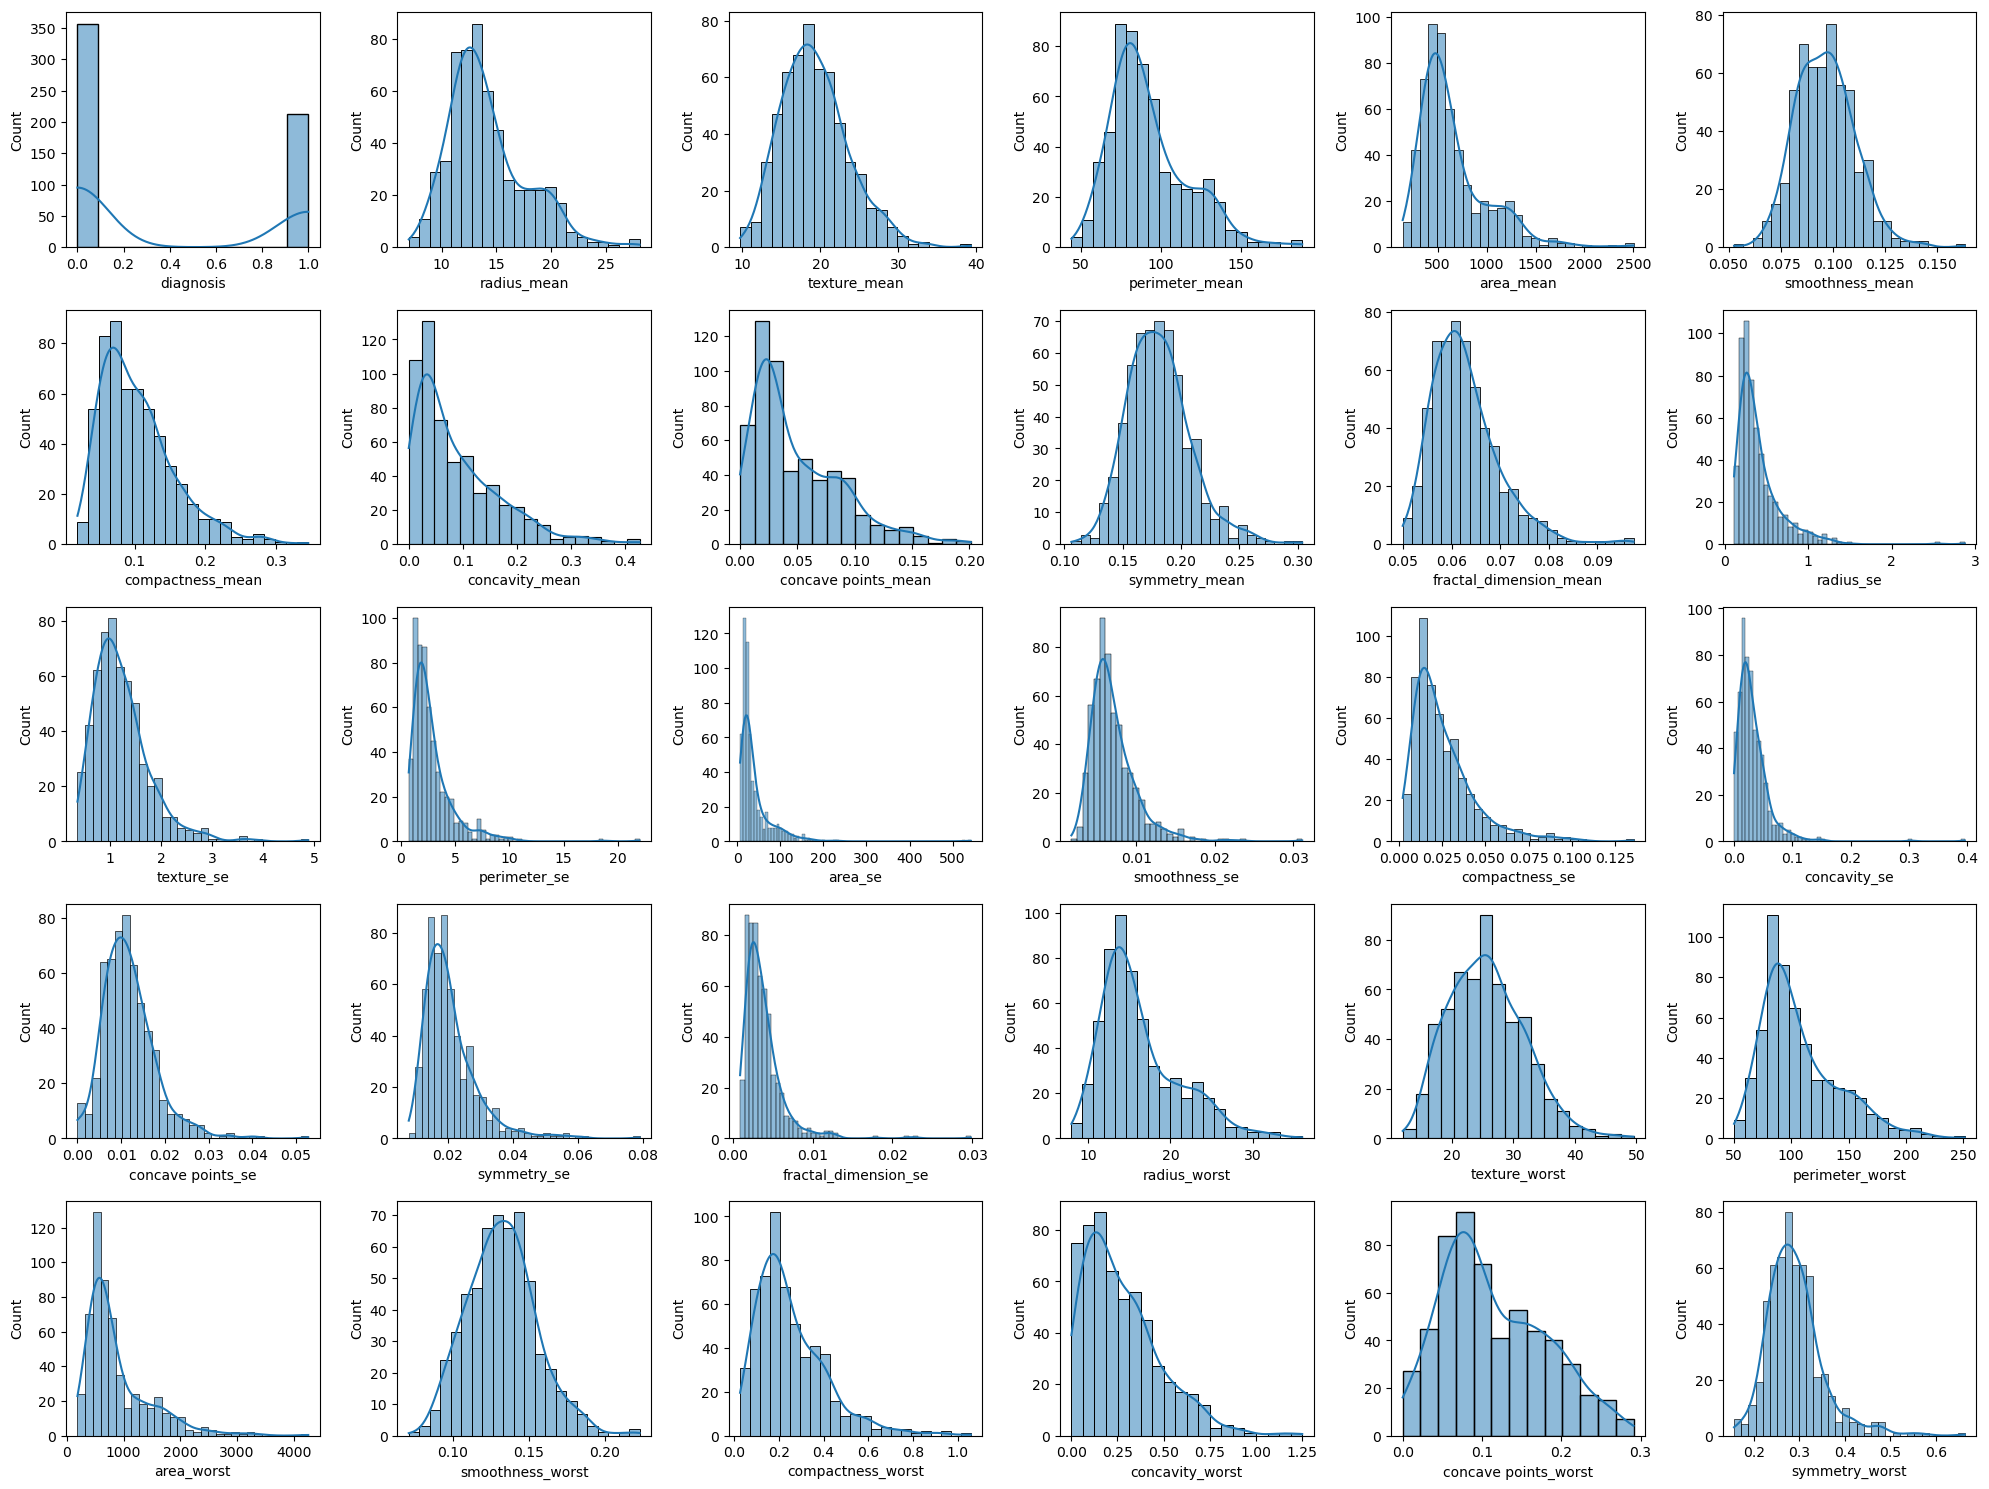

In [13]:
plt.figure(figsize=(20, 15))
plotnumber = 1

for column in df:
    if plotnumber <= 30:  # Limits the number of plots to 30
        ax = plt.subplot(5, 6, plotnumber)  # Creates a subplot at the specified position
        sns.histplot(df[column], kde=True)  # 'kde=True' adds a Kernel Density Estimate overlay
        plt.xlabel(column)  # Sets the label of the x-axis to the column name
        plotnumber += 1  # Increments the plot number

plt.tight_layout()  # Adjusts subplots to fit into the figure area.
plt.show()  # Displays the plot


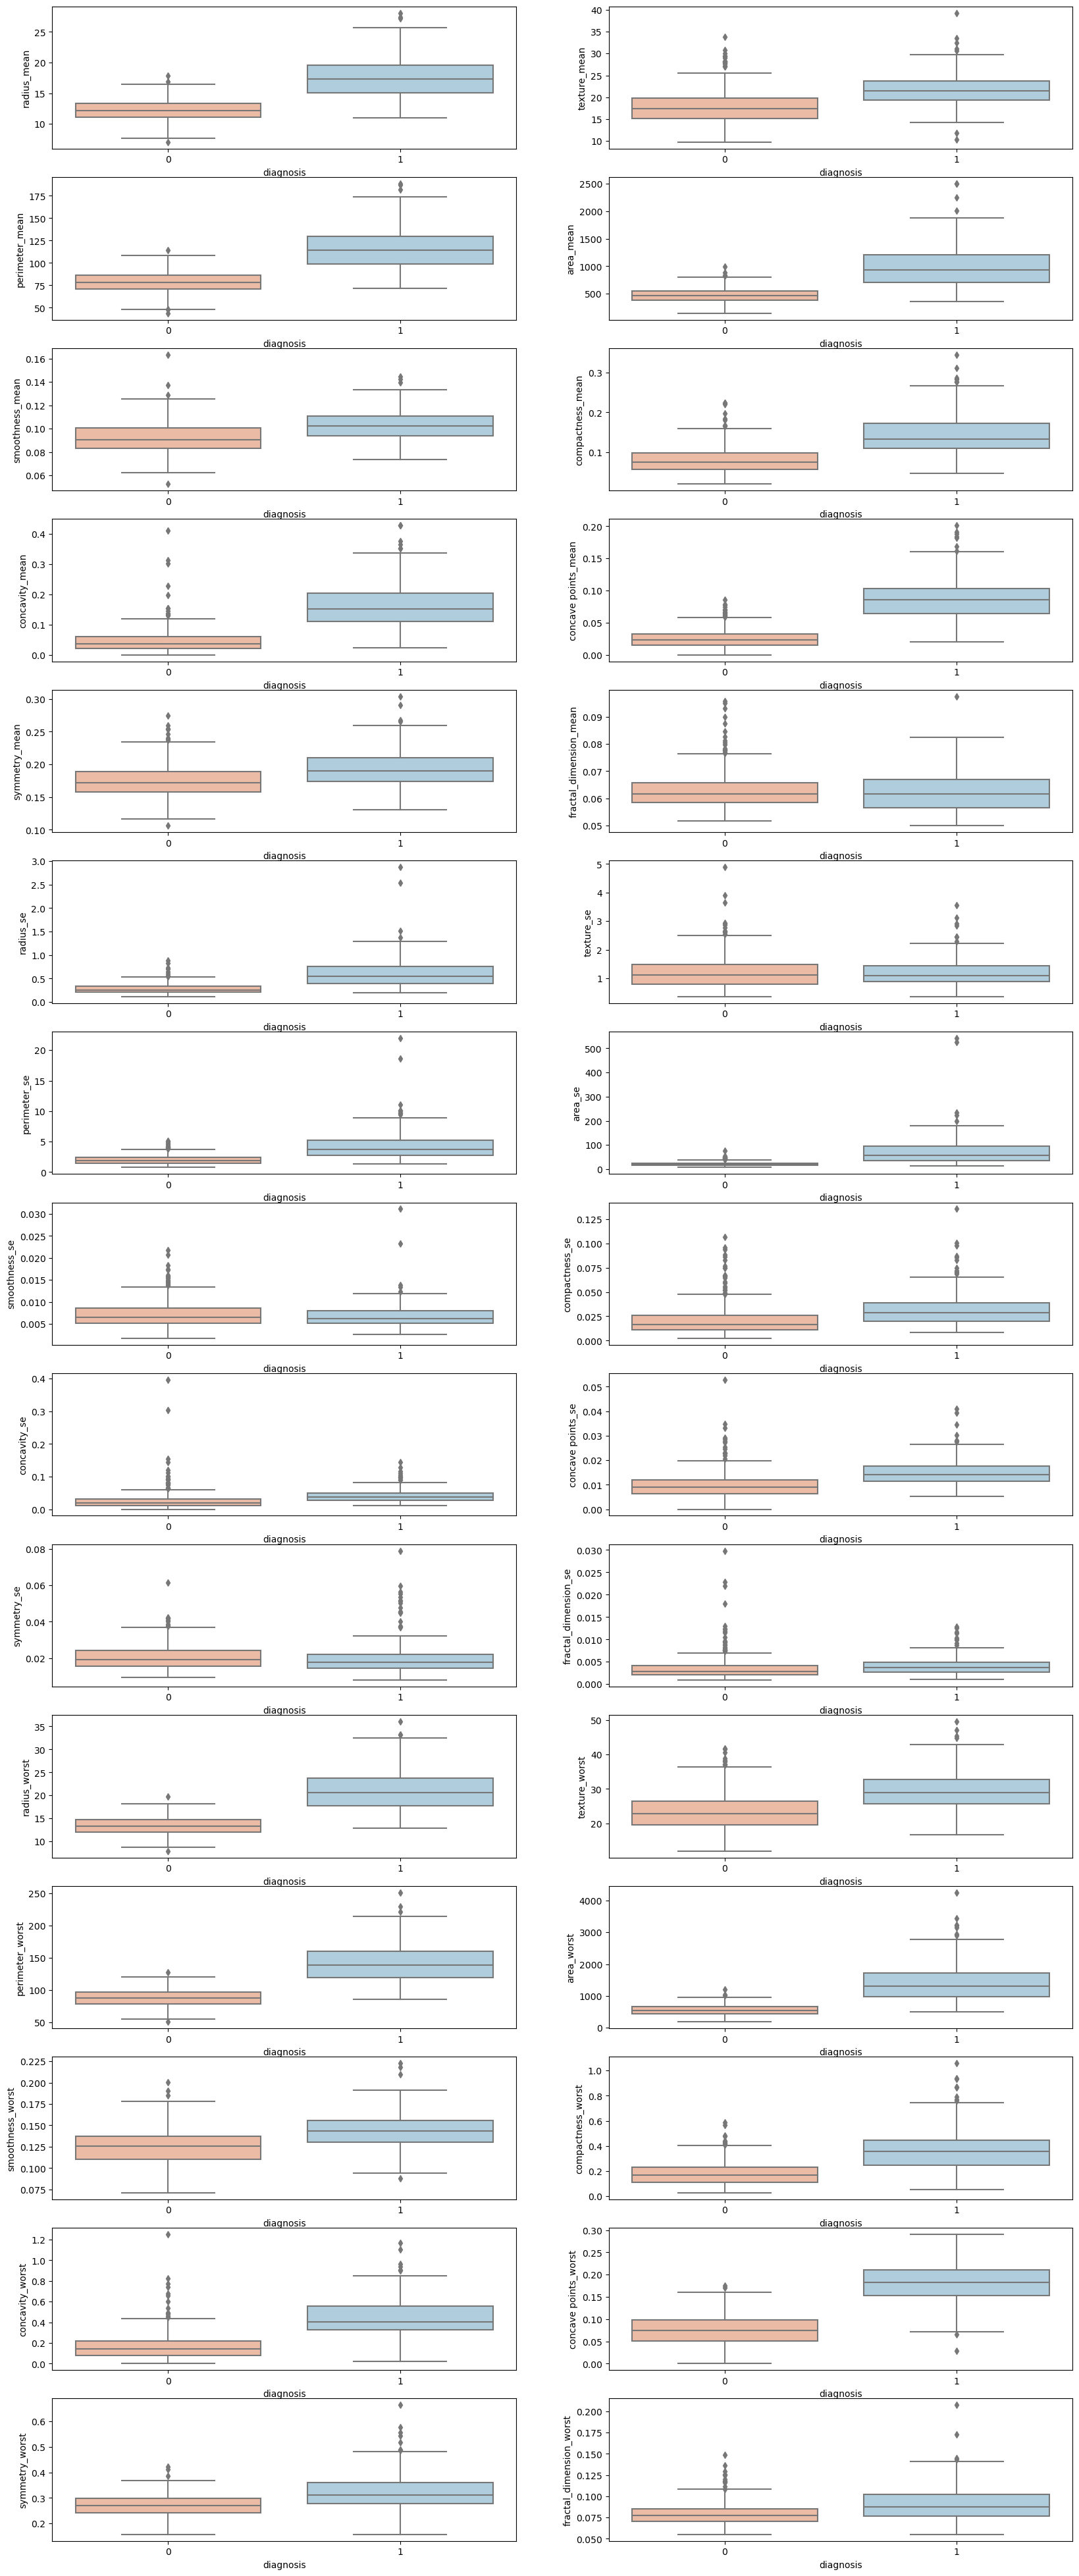

In [14]:
#checking relationship of numerical columns and diagnosis 
nume_cols=[ 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean',
           'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se',
           'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 
           'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst',
           'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst',
           'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

fig=plt.figure(figsize=(20,50))
for i,col in enumerate(nume_cols):
    ax=fig.add_subplot(15,2,i+1)
    sns.boxplot(y=df[col],x=df['diagnosis'], palette = "RdBu")

### Correlation

In [15]:
df.corrwith(df['diagnosis'],numeric_only=True).abs().sort_values(ascending=False)

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
smoothness_se              0

<Axes: >

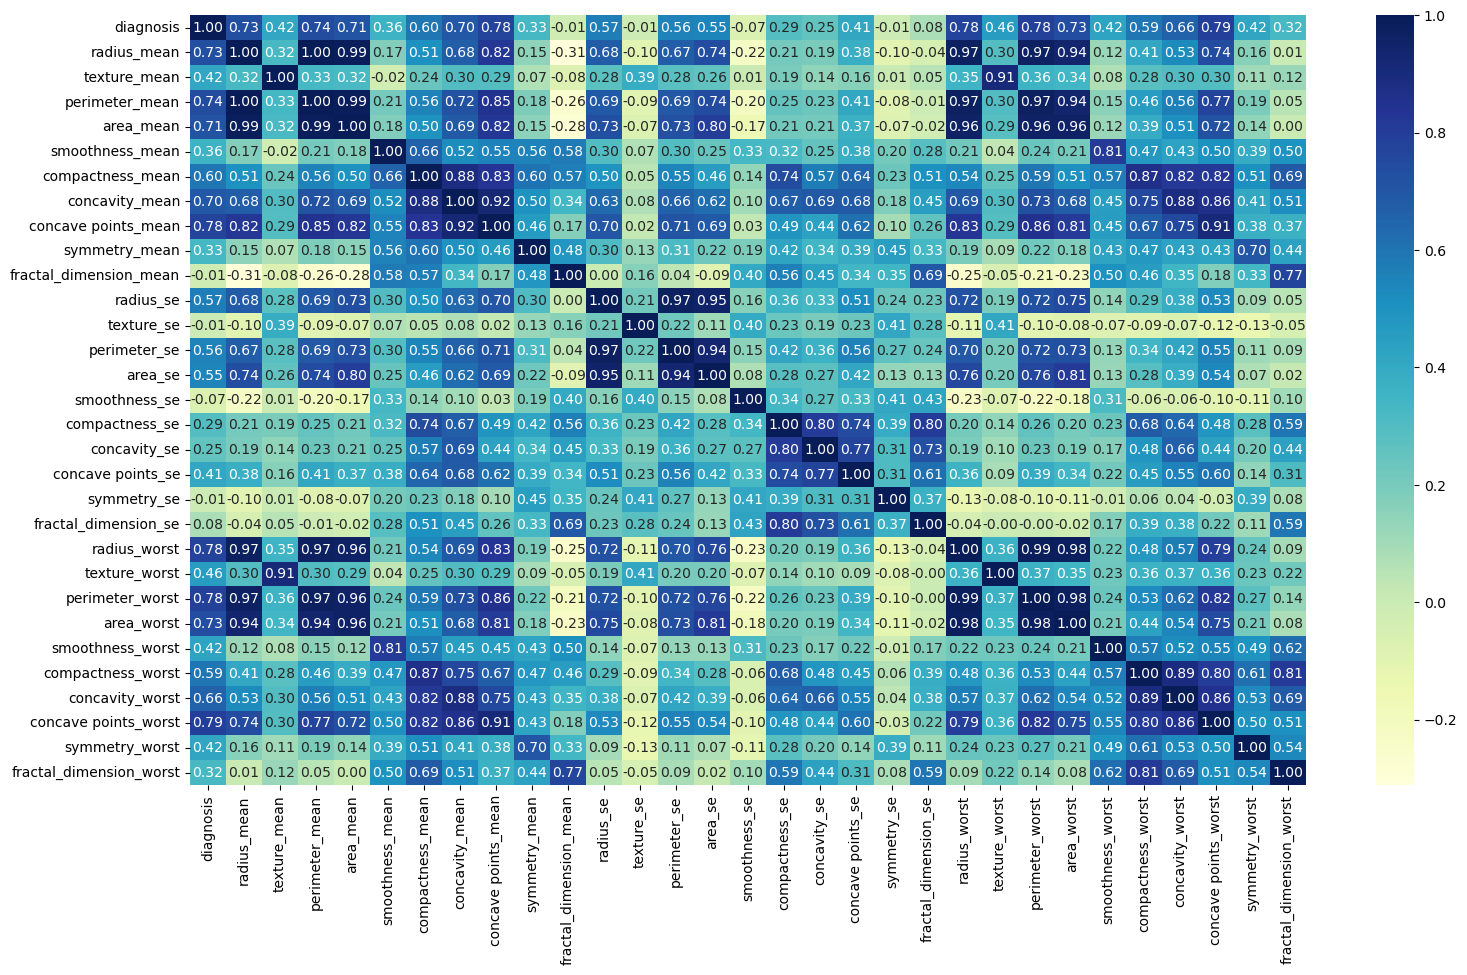

In [16]:
matricita = df.corr()

plt.figure(figsize = (18,10))
sns.heatmap(matricita, cmap= 'YlGnBu',annot = True , fmt='.2f' )


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


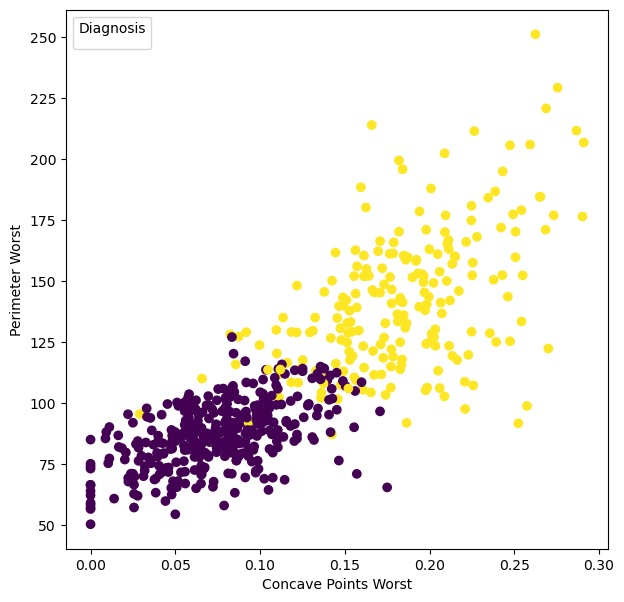

In [17]:
df_x = df['concave points_worst']
df_y = df['perimeter_worst']
df_group = df['diagnosis']

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(df_x, df_y, c=df_group)

ax.set_xlabel('Concave Points Worst')
ax.set_ylabel('Perimeter Worst')
ax.legend(title='Diagnosis')

### Model Building

In [18]:
#Defining features and target variables
features =df.drop(["diagnosis"],axis=1)
target = df["diagnosis"].values.reshape(-1,1)

In [19]:
features.shape

(569, 30)

In [20]:
target.shape

(569, 1)

In [21]:
# Returning the classification metrics for multi_class problem.

def Report(y_test , y_pred):
    print('Accuracy : {}% \n'.format(accuracy_score(y_test , y_pred)*100))
    print('Confusion Matrix : \n\n{}\n'.format(confusion_matrix(y_test , y_pred)))
    print('Classification Report : \n\n{}'.format(classification_report(y_test , y_pred)))
    
def multi_class_metrics(y_true, y_pred):
    print(f'Accuracy  : ', round(metrics.accuracy_score(y_true, y_pred), 3))
    print(f'Precision : ', round(metrics.precision_score(y_true, y_pred, average = 'micro'), 3))
    print(f'Recall    : ', round(metrics.recall_score(y_true, y_pred, average = 'micro'), 3))
    print(f'f1        : ', round(metrics.f1_score(y_true, y_pred, average = 'micro'), 3))  

### SVM

In [22]:
#split X and y in training and test set in 80:20 ratio
x_train , x_test , y_train , y_test = train_test_split(features , target , test_size = 0.2 , random_state = 0)
print('shape of x_train :',x_train.shape)
print('shape of y_train :',y_train.shape)
print('shape of x_test :',x_test.shape)
print('shape of y_test :',y_test.shape)

shape of x_train : (455, 30)
shape of y_train : (455, 1)
shape of x_test : (114, 30)
shape of y_test : (114, 1)


### MODEL WITH GRIDSEARCHCV

- To apply svm algorithm, we will start by using GridSearchCV method to tune parameters.

In [23]:
kernel=["linear","rbf"]
gamma=["auto",0.01,0.001,0.0001,1]
decision_function_shape=["ovo","ovr"]

In [24]:
svm=SVC(random_state=1)
grid_svm=GridSearchCV(estimator=svm,cv=5,  param_grid=dict(kernel=kernel,
                                                         gamma=gamma,
                                                         decision_function_shape=decision_function_shape))
grid_svm.fit(x_train,y_train)
print("best score: ", grid_svm.best_score_)
print("best param: ", grid_svm.best_params_)

best score:  0.9604395604395604
best param:  {'decision_function_shape': 'ovo', 'gamma': 'auto', 'kernel': 'linear'}


In [25]:
svm=SVC(decision_function_shape="ovo",gamma="auto",kernel="linear",random_state=1)
svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)

### Evaluation

In [26]:
Report(y_test , y_pred)

Accuracy : 95.6140350877193% 

Confusion Matrix : 

[[63  4]
 [ 1 46]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        67
           1       0.92      0.98      0.95        47

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [27]:
print('f1 score is:', metrics.f1_score(y_test, y_pred,average="macro"))

f1 score is: 0.9551428346580625


In [28]:
print('Train')
multi_class_metrics(y_train, svm.predict(x_train))
print('\nTest')
multi_class_metrics(y_test, svm.predict(x_test))

Train
Accuracy  :  0.965
Precision :  0.965
Recall    :  0.965
f1        :  0.965

Test
Accuracy  :  0.956
Precision :  0.956
Recall    :  0.956
f1        :  0.956


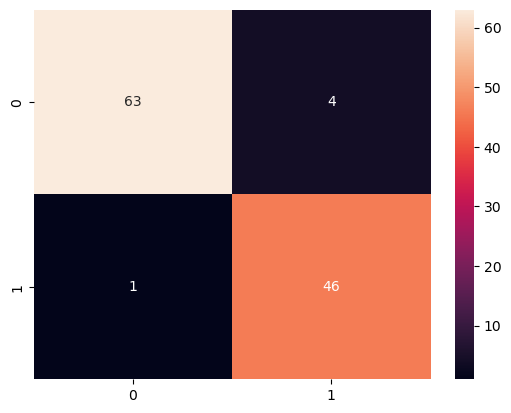

In [29]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

## Accuracy of 95.6%

### -5-2. K-Nearest Neighbour

In [30]:
# independant variables
x=df.drop(["diagnosis"],axis=1)
y = df["diagnosis"].values.reshape(-1,1)  #target
print('shape of x : {} \nshape of y : {}'.format(x.shape , y.shape))

shape of x : (569, 30) 
shape of y : (569, 1)


### MODEL WITH GRIDSEARCHCV

In [31]:
parametrs = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]  # p=1 for Manhattan distance, p=2 for Euclidean distance
}


grid_kn= GridSearchCV(estimator=KNeighborsClassifier() , 
                       param_grid=parametrs,
                       scoring='accuracy',#strategy to evaluate the performance
                        #of the csoss_validation model on the test set
                       cv=10,   # cross_validation generator
                       verbose=1,  #Time of calculate
                       n_jobs=-1)  # help to CPU
grid_kn.fit(x_train,y_train.ravel())

Fitting 10 folds for each of 128 candidates, totalling 1280 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [32]:
grid_kn.best_params_

{'algorithm': 'ball_tree', 'n_neighbors': 11, 'p': 1, 'weights': 'uniform'}

In [33]:
KNN= KNeighborsClassifier(n_neighbors=11, algorithm = 'ball_tree', weights= 'uniform', p=1)
KNN.fit(x_train,y_train.ravel())
y_pred=KNN.predict(x_test)

### Evaluation

In [34]:
Report(y_test , y_pred)

Accuracy : 96.49122807017544% 

Confusion Matrix : 

[[66  1]
 [ 3 44]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        67
           1       0.98      0.94      0.96        47

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [35]:
print('f1 score is:', metrics.f1_score(y_test, y_pred,average="macro"))

f1 score is: 0.9635549872122762


In [36]:
print('Train')
multi_class_metrics(y_train, KNN.predict(x_train))
print('\nTest')
multi_class_metrics(y_test, KNN.predict(x_test))

Train
Accuracy  :  0.945
Precision :  0.945
Recall    :  0.945
f1        :  0.945

Test
Accuracy  :  0.965
Precision :  0.965
Recall    :  0.965
f1        :  0.965


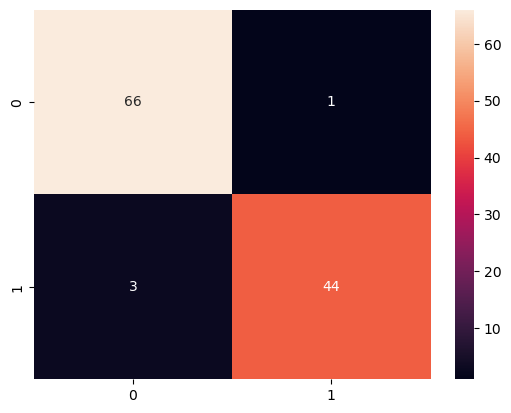

In [37]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

## Accuracy of 96.5%

### Conclusions


#### 6.1. Comparing both method, which one provide better results for your dataset? Why? 

The KNN and supervector model will help us predict whether the tumor is malignant or belignant. If we look at the accuracy, the supervector machine model is higher as we could conclude that it is more effective and more useful.

We utilized SVM and KNN algorithms to predict whether breast tumors are benign or malignant. Given the medical significance of the dataset, we prioritized both high accuracy and minimizing false negatives (FN), as they directly impact patients' outcomes. Our analysis indicates that KNN is the preferred model with a recall of 98%, which minimizes false negatives. Accuracy is very similar in both models.

#### 6.2. As we are talking about supervised techniques, which other method could be used with this dataset? Do you think it would provide better results than SVM and Knn method? Why?

A model we could follow would be the logistic regression model which is quite similar to the two models. We would have to look at the accuracy of this model to see if it could be useful or not. Random forest could also be used as it is robust to overfitting, handles non linear relationships pretty well and provides a measure of feature importance.

#### 6.3. Remember that you had some questions to answer (1st exercise). Could you try to answer them using the model that you selected as the best one? Provide some final conclusions about it.

##### Which features seem to have the most noticeable differences between malignant and benign tumors?

Once we have done a corrwith we can see that the top 3 variables that are most noticiable are: concave points_worst, perimeter_worst and concave points_mean. 

#### Can the KNN model accurately predict whether a tumor is malignant or benign based on the given features?

Yes, the KNN model is accurately predicting the nature of the tumor (benign or malignant) taking into consideration the different features we have chosen. The features, as can be seen above in the code have been selected taking into account the weight or correlation they show with the nature of the tumor.

##### How does the performance of the SVM model compare to the KNN model in distinguishing between malignant and benign tumors?

Even though the accuracy is high on both models, we can observe that the SVM has less false negatives than the KNN, which means that it predicts more accurately the ones that actually are mignant tumors.

##### Are there any features that do not seem to have much impact on the classification of tumor types?

Yes. There are some variables of the dataset (features) that have not shown that much of an impact on the final conclusion on the prediction. For example both symmetry and texture are features that are almost irrelevant when predicting accurately the nature of a tumor.

##### How do the predictions of the KNN and SVM models align with the actual diagnoses provided in the dataset?

Well, although both KNN and SVM have shown results that may be considered accurate enough, there is still some margin of error that both models are keeping. However, we do ot consider these margins as a reason not to validate both models.